In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime

from scipy import stats
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df_bookings = pd.read_csv('dubai_booking_data.csv')
df_events = pd.read_csv('events.csv')

# Preprocessing:

In [4]:
df_bookings.drop_duplicates(inplace=True)
df_bookings.head()

,booking_id,created_at,city,country,category_name,product_id,product_name,experience_date,experience_time,customer_id,number_of_guests,customer_country,device,is_logged_in,web_session_traffic_source,web_session_traffic_medium,web_session_campaign_name,web_session_traffic_origin_country
0,bid_+1fN3xKE6A7bLb3Mb8EHug==,2021-01-01 03:43:45 UTC,Dubai,United Arab Emirates,Dubai Dhow Cruises,11665,Dhow Cruise Dinner in Dubai Marina with Live E...,2021-01-01,20:45:00,cus_IGGMjQetXQZY1o6aU/c6Uw==,4,India,Mobile,False,google,organic,NaN,United Arab Emirates
1,bid_oeNEooQN+xls8LMa8z7sMg==,2021-01-01 05:34:28 UTC,Dubai,United Arab Emirates,Dubai Dhow Cruises,5615,"90-Minute Speedboat Tour of Marina, Atlantis, ...",2021-01-01,15:00:00,cus_90P5Na/LW3T7uN2EeJFRhw==,2,United Arab Emirates,Mobile,False,facebook,cpc,DRM - English,United Arab Emirates
2,bid_+1E+CdL+uNH/9LMgCTphtw==,2021-01-01 06:06:02 UTC,Dubai,United Arab Emirates,Ferrari World Tickets,3989,Ferrari World Abu Dhabi Tickets + Free Shuttle,2021-01-01,11:00:00,cus_8YdV4/OcEUjjEpDF2YWktg==,4,United Arab Emirates,Mobile,False,google,cpc,Dubai - Ferrari World - English - UAE - Search...,United Arab Emirates
3,bid_o55xFpl5f2ndjyBjWqgq/g==,2021-01-01 06:26:37 UTC,Dubai,United Arab Emirates,Museum of Illusions Tickets,9626,Museum of Illusions Dubai,2021-01-01,10:00:00,cus_0A/42nSp/CVTHninFK+1eQ==,3,United Arab Emirates,Desktop,False,google,cpc,Dubai - Museum of Illusions - English - UAE - ...,United Arab Emirates
4,bid_Qj1OEgYvKdCD1YXJzq2+PQ==,2021-01-01 06:45:53 UTC,Dubai,United Arab Emirates,Museum of Illusions Tickets,9626,Museum of Illusions Dubai,2021-01-01,10:00:00,cus_0A/42nSp/CVTHninFK+1eQ==,1,United Arab Emirates,Desktop,False,google,cpc,Dubai - Museum of Illusions - English - UAE - ...,United Arab Emirates


In [5]:
df_events.drop_duplicates(inplace=True)
df_events.head()

,event_id,event_timestamp,event_name,customer_id,session_id,product_id,booking_id,event_type,position,page_type,device,is_logged_in,smart_rec_enabled,rec_impressions,rec_clicks,rec_slot_position,search_filters_used,num_filters_applied,search_query_length,web_session_traffic_origin_country,web_session_traffic_source,web_session_traffic_medium,web_session_campaign_name,city,is_first_time_customer,customer_lifetime_bookings,experiment_bucket,active_discount_flag,supply_tier
0,evt_347e97a21c984d3790e0a52ebf0c2f99,2022-09-24 07:40:50 UTC,product_page_view,cus_+++2FLNoNNnNp3D4uV368Q==,sess_bid_0Vnytef+E3Yiog8EGXuL9A==,6867,NaN,view,city_page,city_page,Mobile,False,0,0,0,NaN,1,0,1,United Arab Emirates,google,organic,NaN,Dubai,1,2,control,0,top_seller
1,evt_19f165ad9c1b4943b037652bce725072,2022-09-24 08:06:01 UTC,product_page_view,cus_+++2FLNoNNnNp3D4uV368Q==,sess_bid_Rr1JqyZPedfyrWMjA1z1qQ==,15992,NaN,view,city_page,city_page,Mobile,False,0,0,0,NaN,0,2,1,United Arab Emirates,google,organic,NaN,Dubai,0,2,control,0,long_tail
2,evt_6daf55c2a5f24b0a9f058f35ac244e5b,2022-12-24 05:35:26 UTC,product_page_view,cus_++2lNb9o3otN1THp5UNctQ==,sess_bid_SmcedZwaBFsvgTu3rLNgUg==,8541,NaN,view,city_page,city_page,Mobile,True,0,0,0,NaN,0,2,0,United Arab Emirates,(direct),(none),NaN,Dubai,0,3,control,0,top_seller
3,evt_77e141a5899a47caa4201a5da17a7d58,2022-09-25 12:58:14 UTC,product_page_view,cus_++BiYSsxgwXsOfov5RVHNQ==,sess_bid_wr8q06j1Tt4mbr+KWApL7A==,15205,NaN,view,city_page,city_page,Mobile,False,0,0,0,NaN,0,0,3,United Arab Emirates,(direct),(none),NaN,Dubai,1,2,control,0,top_seller
4,evt_8e5b21f606f1499f9cbace8f2141681c,2022-09-25 13:13:14 UTC,product_page_view,cus_++BiYSsxgwXsOfov5RVHNQ==,sess_bid_yvFBdhmIdkjl0rl48xrvJA==,15205,NaN,view,city_page,city_page,Mobile,False,0,0,0,NaN,0,2,4,United Arab Emirates,(direct),(none),NaN,Dubai,0,2,control,1,new_listing


In [6]:
df_bookings.shape, df_events.shape

((457620, 18), (267717, 29))

#### Booking data has more rows than events. That shouldn't be the case in an ideal scenario

In [8]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457620 entries, 0 to 457619
Data columns (total 18 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   booking_id                          457620 non-null  object
 1   created_at                          457620 non-null  object
 2   city                                457620 non-null  object
 3   country                             457620 non-null  object
 4   category_name                       457620 non-null  object
 5   product_id                          457620 non-null  int64 
 6   product_name                        457620 non-null  object
 7   experience_date                     457620 non-null  object
 8   experience_time                     457620 non-null  object
 9   customer_id                         457620 non-null  object
 10  number_of_guests                    457620 non-null  int64 
 11  customer_country                    457

In [9]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267717 entries, 0 to 267716
Data columns (total 29 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   event_id                            267717 non-null  object 
 1   event_timestamp                     267717 non-null  object 
 2   event_name                          267717 non-null  object 
 3   customer_id                         267717 non-null  object 
 4   session_id                          267717 non-null  object 
 5   product_id                          267717 non-null  int64  
 6   booking_id                          71703 non-null   object 
 7   event_type                          267717 non-null  object 
 8   position                            267717 non-null  object 
 9   page_type                           267717 non-null  object 
 10  device                              267717 non-null  object 
 11  is_logged_in              

In [10]:
print(df_bookings['created_at'].min(), df_bookings['created_at'].max())
print(df_events['event_timestamp'].min(), df_events['event_timestamp'].max())

2021-01-01 00:33:48 UTC 2022-12-31 23:51:43 UTC
2022-07-01 01:34:37 UTC 2022-12-31 23:47:35 UTC


### Event Data has 6 months of less data than booking. thats why events data has lesser rows.

In [12]:
print(f"timezones in booking data: {df_bookings['created_at'].astype(str).str[-3:].unique()}")
print(f"timezones in events data: {df_events['event_timestamp'].astype(str).str[-3:].unique()}")

timezones in booking data: ['UTC']
timezones in events data: ['UTC']


In [13]:
df_bookings.dtypes

booking_id                            object
created_at                            object
city                                  object
country                               object
category_name                         object
product_id                             int64
product_name                          object
experience_date                       object
experience_time                       object
customer_id                           object
number_of_guests                       int64
customer_country                      object
device                                object
is_logged_in                            bool
web_session_traffic_source            object
web_session_traffic_medium            object
web_session_campaign_name             object
web_session_traffic_origin_country    object
dtype: object

In [14]:
df_events.dtypes

event_id                               object
event_timestamp                        object
event_name                             object
customer_id                            object
session_id                             object
product_id                              int64
booking_id                             object
event_type                             object
position                               object
page_type                              object
device                                 object
is_logged_in                             bool
smart_rec_enabled                       int64
rec_impressions                         int64
rec_clicks                              int64
rec_slot_position                     float64
search_filters_used                     int64
num_filters_applied                     int64
search_query_length                     int64
web_session_traffic_origin_country     object
web_session_traffic_source             object
web_session_traffic_medium        

### Date/Time Conversion:

In [16]:
df_bookings['created_at'] = pd.to_datetime(df_bookings['created_at'], utc=True)
df_bookings['experience_date'] = pd.to_datetime(df_bookings['experience_date'], utc=True)
df_events['event_timestamp'] = pd.to_datetime(df_events['event_timestamp'], utc=True)

df_bookings['created_date'] = df_bookings['created_at'].dt.strftime('%Y%m%d')
df_bookings['exp_date'] = df_bookings['experience_date'].dt.strftime('%Y%m%d')
df_events['event_date'] = df_events['event_timestamp'].dt.strftime('%Y%m%d')

df_bookings['created_time'] = df_bookings['created_at'].dt.strftime('%H%M%S')
df_events['event_time'] = df_events['event_timestamp'].dt.strftime('%H%M%S')

df_bookings['created_hour'] = df_bookings['created_at'].dt.hour
df_events['event_hour'] = df_events['event_timestamp'].dt.hour

temp_timedelta = pd.to_timedelta(df_bookings['experience_time'], errors='coerce')
df_bookings['exp_time'] = (pd.to_datetime(0) + temp_timedelta).dt.strftime('%H%M%S')
df_bookings['exp_hour'] = temp_timedelta.dt.components.hours

df_bookings[['created_at', 'created_date', 'created_time', 'created_hour', 'experience_date', 'exp_date', 'experience_time', 'exp_time', 'exp_hour']].head()

,created_at,created_date,created_time,created_hour,experience_date,exp_date,experience_time,exp_time,exp_hour
0,2021-01-01 03:43:45+00:00,20210101,034345,3,2021-01-01 00:00:00+00:00,20210101,20:45:00,204500,20
1,2021-01-01 05:34:28+00:00,20210101,053428,5,2021-01-01 00:00:00+00:00,20210101,15:00:00,150000,15
2,2021-01-01 06:06:02+00:00,20210101,060602,6,2021-01-01 00:00:00+00:00,20210101,11:00:00,110000,11
3,2021-01-01 06:26:37+00:00,20210101,062637,6,2021-01-01 00:00:00+00:00,20210101,10:00:00,100000,10
4,2021-01-01 06:45:53+00:00,20210101,064553,6,2021-01-01 00:00:00+00:00,20210101,10:00:00,100000,10


In [17]:
df_bookings[['created_at', 'created_date', 'created_time', 'created_hour', 'experience_date', 'exp_date', 'experience_time', 'exp_time', 'exp_hour']].dtypes

created_at         datetime64[ns, UTC]
created_date                    object
created_time                    object
created_hour                     int32
experience_date    datetime64[ns, UTC]
exp_date                        object
experience_time                 object
exp_time                        object
exp_hour                         int64
dtype: object

In [18]:
df_events[['event_timestamp', 'event_date', 'event_time', 'event_hour']].head()

,event_timestamp,event_date,event_time,event_hour
0,2022-09-24 07:40:50+00:00,20220924,074050,7
1,2022-09-24 08:06:01+00:00,20220924,080601,8
2,2022-12-24 05:35:26+00:00,20221224,053526,5
3,2022-09-25 12:58:14+00:00,20220925,125814,12
4,2022-09-25 13:13:14+00:00,20220925,131314,13


In [19]:
df_events[['event_timestamp', 'event_date', 'event_time', 'event_hour']].dtypes

event_timestamp    datetime64[ns, UTC]
event_date                      object
event_time                      object
event_hour                       int32
dtype: object

# Handling missing values:

### Bookings Data

In [21]:
print("Booking Data:")
df_bookings.isnull().sum()

Booking Data:


booking_id                                 0
created_at                                 0
city                                       0
country                                    0
category_name                              0
product_id                                 0
product_name                               0
experience_date                            0
experience_time                            0
customer_id                                0
number_of_guests                           0
customer_country                           0
device                                     0
is_logged_in                               0
web_session_traffic_source             52049
web_session_traffic_medium             52049
web_session_campaign_name             158303
web_session_traffic_origin_country     52202
created_date                               0
exp_date                                   0
created_time                               0
created_hour                               0
exp_time  

In [22]:
round(df_bookings['web_session_traffic_source'].value_counts(normalize=True)*100,2)

web_session_traffic_source
google                        81.96
(direct)                       9.69
webengage                      4.16
bing                           1.36
dubai_frame                    0.44
                              ...  
ebox.co.il                     0.00
ladyandhersweetescapes.com     0.00
thedubaitickets.com            0.00
mail.bg                        0.00
acsds.eubank.kz                0.00
Name: proportion, Length: 458, dtype: float64

In [23]:
round((df_bookings['web_session_traffic_source'].isnull().sum() / df_bookings.shape[0])*100,2)

11.37

In [63]:
df_bookings['web_session_traffic_source'] = df_bookings['web_session_traffic_source'].fillna('unkown/no_web_traffic')
df_bookings['web_session_traffic_medium'] = df_bookings['web_session_traffic_medium'].fillna('unkown/no_web_traffic')

In [25]:
round(df_bookings['web_session_campaign_name'].value_counts(normalize=True)*100,2)

web_session_campaign_name
Dubai - Burj Khalifa - English - UAE - Search - All - All - cid158               12.66
Dubai - Dubai Frame - English - UAE - Search - All - All - cid1447                8.63
Dubai - Burj Khalifa - Other Languages - UAE - Search - All - All - cid158        5.73
Dubai - Things to do - All Languages - UAE - TTD - All - All                      4.44
Dubai - Dubai Aquarium - English - UAE - Search - All - All - cid1003 - Dubai     4.03
                                                                                 ...  
dubai_newsletter_8                                                                0.00
Dubai - Smash Room - Other Languages - UAE - Search - All - All - cid             0.00
a000CWPncenAE                                                                     0.00
r000DW9naenAE                                                                     0.00
r007NPGncenAE                                                                     0.00
Name: proportion,

In [26]:
round((df_bookings['web_session_campaign_name'].isnull().sum() / df_bookings.shape[0])*100,2)

34.59

In [27]:
null_campaigns = df_bookings[df_bookings['web_session_campaign_name'].isnull()]

source_dist = null_campaigns['web_session_traffic_source'].value_counts(normalize=True) * 100
print("Traffic Sources for Null Campaigns:\n", source_dist)

Traffic Sources for Null Campaigns:
 web_session_traffic_source
google                        35.843288
unkown/no_web_traffic         32.879352
(direct)                      24.804331
bing                           1.081470
metric.picodi.com              0.861007
                                ...    
mail.aliyun.com                0.000632
ebox.co.il                     0.000632
ladyandhersweetescapes.com     0.000632
thedubaitickets.com            0.000632
acsds.eubank.kz                0.000632
Name: proportion, Length: 436, dtype: float64


In [28]:
df_bookings['web_session_traffic_source'].unique()

array(['google', 'facebook', 'unkown/no_web_traffic', '(direct)',
       'secure.livechatinc.com', 'webengage', 'headout.kb.help',
       'zendesk', 'bing', 'newsletter', 'duckduckgo', 'rezeem',
       'shareasale', 'dhow-cruise.com', 'facebook.com', 'ampproject.org',
       'groupon.ae', 'ecosia.org', 'tourscanner', 'serverTrigerred',
       'metric.picodi.net', 'dubai_frame', 'miraclegardentickets.com',
       'magdalena_plucińska', 'yahoo', 'uk.search.yahoo.com', 'yandex.ru',
       'nm.abv.bg', 'vrparkdubaitickets.com', 'rezeem.com',
       'thedubaiframe.com', 'livechatinc.com', 'l.facebook.com',
       'm.facebook.com', 'aindubai.info', 'dubaiexklusiv',
       'theaindubai.com', 'SilverpopMailing', 'mobile.facebook.com',
       'retailmenot.com', 'promocode.cloud', 'book.imgworldstickets.com',
       'nm20.abv.bg', 'FB', 'rediffmail.com', 'cse.google.com',
       'sociablelabs.com', 'vouchercodesuae.com',
       'topgolfdubaitickets.com', 'tourscanner.com', 'mail.google.com',
   

In [29]:
def refine_campaign(row):
    source = str(row['web_session_traffic_source']).lower()
    
    if any(s in source for s in ['google', 'bing', 'yahoo', 'duckduckgo']):
        return 'organic_search_no_campaign'
    
    if '(direct)' in source:
        return 'direct_no_campaign'
        
    return 'unattributed'

mask = df_bookings['web_session_campaign_name'].isnull()
df_bookings.loc[mask, 'web_session_campaign_name'] = df_bookings[mask].apply(refine_campaign, axis=1)

round(df_bookings['web_session_campaign_name'].value_counts(normalize=True)*100,2)

web_session_campaign_name
unattributed                                                                                  13.02
organic_search_no_campaign                                                                    12.99
direct_no_campaign                                                                             8.58
Dubai - Burj Khalifa - English - UAE - Search - All - All - cid158                             8.28
Dubai - Dubai Frame - English - UAE - Search - All - All - cid1447                             5.64
                                                                                              ...  
Dubai - Al Maha Desert Resort & Spa - English - UAE - Search - All - All - cid1074 - Dubai     0.00
r000WUIncenUS                                                                                  0.00
cashback_vatican_en                                                                            0.00
r0008FMnaenAU                                                             

#### web_session_traffic_origin_country:

In [31]:
round(df_bookings['web_session_traffic_origin_country'].value_counts(normalize=True)*100,2)

web_session_traffic_origin_country
United Arab Emirates    80.79
India                    3.23
United Kingdom           1.88
United States            1.88
Saudi Arabia             1.23
                        ...  
Western Sahara           0.00
American Samoa           0.00
Bahamas                  0.00
Lesotho                  0.00
Liechtenstein            0.00
Name: proportion, Length: 180, dtype: float64

In [33]:
df_bookings['web_session_traffic_origin_country'] = df_bookings['web_session_traffic_origin_country'].fillna('unkown/no_web_traffic')

In [65]:
df_bookings.isna().sum()

booking_id                            0
created_at                            0
city                                  0
country                               0
category_name                         0
product_id                            0
product_name                          0
experience_date                       0
experience_time                       0
customer_id                           0
number_of_guests                      0
customer_country                      0
device                                0
is_logged_in                          0
web_session_traffic_source            0
web_session_traffic_medium            0
web_session_campaign_name             0
web_session_traffic_origin_country    0
created_date                          0
exp_date                              0
created_time                          0
created_hour                          0
exp_time                              0
exp_hour                              0
dtype: int64

## Events Data:

In [68]:
df_events.isna().sum()

event_id                                   0
event_timestamp                            0
event_name                                 0
customer_id                                0
session_id                                 0
product_id                                 0
booking_id                            196014
event_type                                 0
position                                   0
page_type                                  0
device                                     0
is_logged_in                               0
smart_rec_enabled                          0
rec_impressions                            0
rec_clicks                                 0
rec_slot_position                     238623
search_filters_used                        0
num_filters_applied                        0
search_query_length                        0
web_session_traffic_origin_country     31055
web_session_traffic_source             30947
web_session_traffic_medium             30947
web_sessio

In [70]:
df_events['booking_id'] = df_events['booking_id'].fillna('no_booking_done')

In [72]:
round((df_events['rec_slot_position'].isna().sum() / df_events.shape[0])*100,2)

89.13

In [94]:
round(df_events[df_events['rec_slot_position'].isna()]['smart_rec_enabled'].value_counts(normalize=True)*100,2)

smart_rec_enabled
1    50.6
0    49.4
Name: proportion, dtype: float64

In [98]:
round(df_events[df_events['rec_slot_position'].isna()]['rec_clicks'].value_counts(normalize=True)*100,2)

rec_clicks
0    100.0
Name: proportion, dtype: float64

#### This means rec_slot_position is only tracked for events when the recommendation is clicked. filling null values with 0 to represent no click happened

In [105]:
df_events['rec_slot_position'] = df_events['rec_slot_position'].fillna(0).astype(int)

In [107]:
df_events['web_session_traffic_source'] = df_events['web_session_traffic_source'].fillna('unkown/no_web_traffic')
df_events['web_session_traffic_medium'] = df_events['web_session_traffic_medium'].fillna('unkown/no_web_traffic')

In [117]:
df_events.isnull().sum()

event_id                              0
event_timestamp                       0
event_name                            0
customer_id                           0
session_id                            0
product_id                            0
booking_id                            0
event_type                            0
position                              0
page_type                             0
device                                0
is_logged_in                          0
smart_rec_enabled                     0
rec_impressions                       0
rec_clicks                            0
rec_slot_position                     0
search_filters_used                   0
num_filters_applied                   0
search_query_length                   0
web_session_traffic_origin_country    0
web_session_traffic_source            0
web_session_traffic_medium            0
web_session_campaign_name             0
city                                  0
is_first_time_customer                0


In [111]:
def refine_campaign(row):
    source = str(row['web_session_traffic_source']).lower()
    
    if any(s in source for s in ['google', 'bing', 'yahoo', 'duckduckgo']):
        return 'organic_search_no_campaign'
    
    if '(direct)' in source:
        return 'direct_no_campaign'
        
    return 'unattributed'

mask = df_events['web_session_campaign_name'].isnull()
df_events.loc[mask, 'web_session_campaign_name'] = df_events[mask].apply(refine_campaign, axis=1)

round(df_events['web_session_campaign_name'].value_counts(normalize=True)*100,2)

web_session_campaign_name
organic_search_no_campaign                                            14.69
unattributed                                                          12.85
direct_no_campaign                                                    11.00
Dubai - Burj Khalifa - English - UAE - Search - All - All - cid158     8.79
Dubai - Dubai Frame - English - UAE - Search - All - All - cid1447     6.38
                                                                      ...  
r001Z3ArcenIN                                                          0.00
a006ALKncenAE                                                          0.00
r001T9RnaenUS                                                          0.00
a001VVLncdeDE                                                          0.00
r0001C9ncenAE                                                          0.00
Name: proportion, Length: 576, dtype: float64

In [115]:
df_events['web_session_traffic_origin_country'] = df_events['web_session_traffic_origin_country'].fillna('unkown/no_web_traffic')

In [124]:
df_events.isnull().sum()

event_id                              0
event_timestamp                       0
event_name                            0
customer_id                           0
session_id                            0
product_id                            0
booking_id                            0
event_type                            0
position                              0
page_type                             0
device                                0
is_logged_in                          0
smart_rec_enabled                     0
rec_impressions                       0
rec_clicks                            0
rec_slot_position                     0
search_filters_used                   0
num_filters_applied                   0
search_query_length                   0
web_session_traffic_origin_country    0
web_session_traffic_source            0
web_session_traffic_medium            0
web_session_campaign_name             0
city                                  0
is_first_time_customer                0


In [126]:
df_bookings.isna().sum()

booking_id                            0
created_at                            0
city                                  0
country                               0
category_name                         0
product_id                            0
product_name                          0
experience_date                       0
experience_time                       0
customer_id                           0
number_of_guests                      0
customer_country                      0
device                                0
is_logged_in                          0
web_session_traffic_source            0
web_session_traffic_medium            0
web_session_campaign_name             0
web_session_traffic_origin_country    0
created_date                          0
exp_date                              0
created_time                          0
created_hour                          0
exp_time                              0
exp_hour                              0
dtype: int64

In [276]:
drop_cols = ['experience_date', 'experience_time', 'created_at']
df_bookings = df_bookings.drop(columns=drop_cols)
df_bookings

,booking_id,city,country,category_name,product_id,product_name,customer_id,number_of_guests,customer_country,device,is_logged_in,web_session_traffic_source,web_session_traffic_medium,web_session_campaign_name,web_session_traffic_origin_country,created_date,exp_date,created_time,created_hour,exp_time,exp_hour
0,bid_+1fN3xKE6A7bLb3Mb8EHug==,Dubai,United Arab Emirates,Dubai Dhow Cruises,11665,Dhow Cruise Dinner in Dubai Marina with Live E...,cus_IGGMjQetXQZY1o6aU/c6Uw==,4,India,Mobile,False,google,organic,organic_search_no_campaign,United Arab Emirates,20210101,20210101,034345,3,204500,20
1,bid_oeNEooQN+xls8LMa8z7sMg==,Dubai,United Arab Emirates,Dubai Dhow Cruises,5615,"90-Minute Speedboat Tour of Marina, Atlantis, ...",cus_90P5Na/LW3T7uN2EeJFRhw==,2,United Arab Emirates,Mobile,False,facebook,cpc,DRM - English,United Arab Emirates,20210101,20210101,053428,5,150000,15
2,bid_+1E+CdL+uNH/9LMgCTphtw==,Dubai,United Arab Emirates,Ferrari World Tickets,3989,Ferrari World Abu Dhabi Tickets + Free Shuttle,cus_8YdV4/OcEUjjEpDF2YWktg==,4,United Arab Emirates,Mobile,False,google,cpc,Dubai - Ferrari World - English - UAE - Search...,United Arab Emirates,20210101,20210101,060602,6,110000,11
3,bid_o55xFpl5f2ndjyBjWqgq/g==,Dubai,United Arab Emirates,Museum of Illusions Tickets,9626,Museum of Illusions Dubai,cus_0A/42nSp/CVTHninFK+1eQ==,3,United Arab Emirates,Desktop,False,google,cpc,Dubai - Museum of Illusions - English - UAE - ...,United Arab Emirates,20210101,20210101,062637,6,100000,10
4,bid_Qj1OEgYvKdCD1YXJzq2+PQ==,Dubai,United Arab Emirates,Museum of Illusions Tickets,9626,Museum of Illusions Dubai,cus_0A/42nSp/CVTHninFK+1eQ==,1,United Arab Emirates,Desktop,False,google,cpc,Dubai - Museum of Illusions - English - UAE - ...,United Arab Emirates,20210101,20210101,064553,6,100000,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457615,bid_8DnULqWYueMBbBeQwPtoWw==,Dubai,United Arab Emirates,Wild Wadi Tickets,1875,Wild Wadi Water Park Tickets,cus_QXf23M1LdF7gEqWaqZ0iUg==,2,Kazakhstan,Mobile,False,(direct),(none),direct_no_campaign,Kazakhstan,20221229,20230101,192815,19,100000,10
457616,bid_bHv5RVfuypSgggjvoMUZtQ==,Dubai,United Arab Emirates,Wild Wadi Tickets,1875,Wild Wadi Water Park Tickets,cus_IeL4C0KsBjSrQwdFkZPmAQ==,3,Saudi Arabia,Mobile,False,google,cpc,organic_search_no_campaign,Saudi Arabia,20221229,20221231,215928,21,100000,10
457617,bid_IjcnoEBVJVpVOw8Lb3zo8w==,Dubai,United Arab Emirates,Wild Wadi Tickets,1875,Wild Wadi Water Park Tickets,cus_pprbst4CuGjSpZ8rsAWV6g==,2,Kenya,Mobile,False,google,cpc,Dubai - Wild Wadi Waterpark - English - UAE - ...,United Arab Emirates,20221230,20221230,064941,6,100000,10
457618,bid_u1BRd6nDyiHnOXBrsCbIHQ==,Dubai,United Arab Emirates,Wild Wadi Tickets,1875,Wild Wadi Water Park Tickets,cus_LpvKiImFeSHdBe9D8fI7Tg==,2,Saudi Arabia,Mobile,False,google,cpc,organic_search_no_campaign,United Arab Emirates,20221231,20221231,082106,8,100000,10


# User Personas:

## Lead Days:

In [320]:
df_bookings['created_date'] = pd.to_datetime(df_bookings['created_date'], errors='coerce', utc=True)
df_bookings['exp_date'] = pd.to_datetime(df_bookings['exp_date'], errors='coerce', utc=True)
df_bookings['lead_days'] = (df_bookings['exp_date'] - df_bookings['created_date']).dt.days
df_bookings

,booking_id,city,country,category_name,product_id,product_name,customer_id,number_of_guests,customer_country,device,is_logged_in,web_session_traffic_source,web_session_traffic_medium,web_session_campaign_name,web_session_traffic_origin_country,created_date,exp_date,created_time,created_hour,exp_time,exp_hour,lead_days
0,bid_+1fN3xKE6A7bLb3Mb8EHug==,Dubai,United Arab Emirates,Dubai Dhow Cruises,11665,Dhow Cruise Dinner in Dubai Marina with Live E...,cus_IGGMjQetXQZY1o6aU/c6Uw==,4,India,Mobile,False,google,organic,organic_search_no_campaign,United Arab Emirates,2021-01-01 00:00:00+00:00,2021-01-01 00:00:00+00:00,034345,3,204500,20,0
1,bid_oeNEooQN+xls8LMa8z7sMg==,Dubai,United Arab Emirates,Dubai Dhow Cruises,5615,"90-Minute Speedboat Tour of Marina, Atlantis, ...",cus_90P5Na/LW3T7uN2EeJFRhw==,2,United Arab Emirates,Mobile,False,facebook,cpc,DRM - English,United Arab Emirates,2021-01-01 00:00:00+00:00,2021-01-01 00:00:00+00:00,053428,5,150000,15,0
2,bid_+1E+CdL+uNH/9LMgCTphtw==,Dubai,United Arab Emirates,Ferrari World Tickets,3989,Ferrari World Abu Dhabi Tickets + Free Shuttle,cus_8YdV4/OcEUjjEpDF2YWktg==,4,United Arab Emirates,Mobile,False,google,cpc,Dubai - Ferrari World - English - UAE - Search...,United Arab Emirates,2021-01-01 00:00:00+00:00,2021-01-01 00:00:00+00:00,060602,6,110000,11,0
3,bid_o55xFpl5f2ndjyBjWqgq/g==,Dubai,United Arab Emirates,Museum of Illusions Tickets,9626,Museum of Illusions Dubai,cus_0A/42nSp/CVTHninFK+1eQ==,3,United Arab Emirates,Desktop,False,google,cpc,Dubai - Museum of Illusions - English - UAE - ...,United Arab Emirates,2021-01-01 00:00:00+00:00,2021-01-01 00:00:00+00:00,062637,6,100000,10,0
4,bid_Qj1OEgYvKdCD1YXJzq2+PQ==,Dubai,United Arab Emirates,Museum of Illusions Tickets,9626,Museum of Illusions Dubai,cus_0A/42nSp/CVTHninFK+1eQ==,1,United Arab Emirates,Desktop,False,google,cpc,Dubai - Museum of Illusions - English - UAE - ...,United Arab Emirates,2021-01-01 00:00:00+00:00,2021-01-01 00:00:00+00:00,064553,6,100000,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457615,bid_8DnULqWYueMBbBeQwPtoWw==,Dubai,United Arab Emirates,Wild Wadi Tickets,1875,Wild Wadi Water Park Tickets,cus_QXf23M1LdF7gEqWaqZ0iUg==,2,Kazakhstan,Mobile,False,(direct),(none),direct_no_campaign,Kazakhstan,2022-12-29 00:00:00+00:00,2023-01-01 00:00:00+00:00,192815,19,100000,10,3
457616,bid_bHv5RVfuypSgggjvoMUZtQ==,Dubai,United Arab Emirates,Wild Wadi Tickets,1875,Wild Wadi Water Park Tickets,cus_IeL4C0KsBjSrQwdFkZPmAQ==,3,Saudi Arabia,Mobile,False,google,cpc,organic_search_no_campaign,Saudi Arabia,2022-12-29 00:00:00+00:00,2022-12-31 00:00:00+00:00,215928,21,100000,10,2
457617,bid_IjcnoEBVJVpVOw8Lb3zo8w==,Dubai,United Arab Emirates,Wild Wadi Tickets,1875,Wild Wadi Water Park Tickets,cus_pprbst4CuGjSpZ8rsAWV6g==,2,Kenya,Mobile,False,google,cpc,Dubai - Wild Wadi Waterpark - English - UAE - ...,United Arab Emirates,2022-12-30 00:00:00+00:00,2022-12-30 00:00:00+00:00,064941,6,100000,10,0
457618,bid_u1BRd6nDyiHnOXBrsCbIHQ==,Dubai,United Arab Emirates,Wild Wadi Tickets,1875,Wild Wadi Water Park Tickets,cus_LpvKiImFeSHdBe9D8fI7Tg==,2,Saudi Arabia,Mobile,False,google,cpc,organic_search_no_campaign,United Arab Emirates,2022-12-31 00:00:00+00:00,2022-12-31 00:00:00+00:00,082106,8,100000,10,0


In [638]:
lead_time_dist = (pd.DataFrame(df_bookings['lead_days'].value_counts(normalize=True)*100).round(1).sort_index().cumsum())
lead_time_dist[1:20]   

,proportion
lead_days,
0,53.8
1,75.9
2,81.8
3,85.1
4,87.3
5,88.9
6,90.1
7,91.2
8,92.1


In [411]:
round(df_bookings['lead_days'].value_counts(normalize=True)*100,1).head(10)

lead_days
0    53.8
1    22.1
2     5.9
3     3.3
4     2.2
5     1.6
6     1.2
7     1.1
8     0.9
9     0.8
Name: proportion, dtype: float64

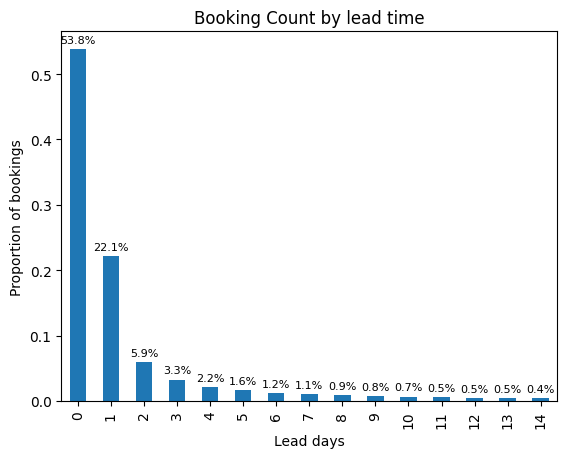

In [642]:
lead_share = (
    df_bookings['lead_days']
    .value_counts(normalize=True)
    .sort_index()
)[1:]

ax = lead_share.loc[:14].plot(kind='bar')

plt.ylabel('Proportion of bookings')
plt.xlabel('Lead days')
plt.title('Booking Count by lead time')

for p in ax.patches:
    value = p.get_height()
    ax.annotate(
        f'{value*100:.1f}%',
        (p.get_x() + p.get_width() / 2, value),
        ha='center',
        va='bottom',
        fontsize=8,
        xytext=(0, 3),
        textcoords='offset points'
    )

plt.show()

#### 0 : same day
#### 1 : next day
#### 2-4 : short planner
#### 5-7 : moderate planner
#### 7+ : advance planner

In [346]:
def lead_day_bucket(x):
    if x == 0:
        return 'same_day'
    elif x == 1:
        return 'next_day'
    elif x <=4:
        return 'short_planner'
    elif x <= 7:
        return 'moderate_planner'
    else:
        return 'advance_planner'

df_bookings['lead_days_bin'] = df_bookings['lead_days'].apply(lead_day_bucket)

round(df_bookings['lead_days_bin'].value_counts(normalize=True)*100,1)

lead_days_bin
same_day            53.8
next_day            22.1
short_planner       11.3
advance_planner      8.8
moderate_planner     3.9
Name: proportion, dtype: float64

## Guest Size:

In [382]:
round(df_bookings['number_of_guests'].value_counts(normalize=True)*100,2).sort_index().head(20)

number_of_guests
1     12.99
2     39.10
3     18.27
4     15.50
5      6.64
6      3.41
7      1.73
8      1.06
9      0.51
10     0.49
11     0.09
12     0.06
13     0.04
14     0.03
15     0.02
16     0.01
17     0.01
18     0.00
19     0.00
20     0.02
Name: proportion, dtype: float64

In [386]:
round(df_bookings['number_of_guests'].value_counts(normalize=True)*100,2).sort_index().cumsum().head(20)

number_of_guests
1     12.99
2     52.09
3     70.36
4     85.86
5     92.50
6     95.91
7     97.64
8     98.70
9     99.21
10    99.70
11    99.79
12    99.85
13    99.89
14    99.92
15    99.94
16    99.95
17    99.96
18    99.96
19    99.96
20    99.98
Name: proportion, dtype: float64

#### 1 : solo
#### 2 : couple
#### 3-4 : small group
#### 5+ : large group

In [388]:
def guest_bin(x):
    if x == 1:
        return 'solo'
    elif x == 2:
        return 'couple'
    elif x <= 4:
        return 'small_group'
    else:
        return 'large_group'

df_bookings['guest_size_bin'] = df_bookings['number_of_guests'].apply(guest_bin)
round(df_bookings['guest_size_bin'].value_counts(normalize=True)*100,1)

guest_size_bin
couple         39.1
small_group    33.8
large_group    14.1
solo           13.0
Name: proportion, dtype: float64

## Booking Count:

In [415]:
df_bookings[['customer_id', 'booking_id']].value_counts()

customer_id                   booking_id                  
cus_+++2FLNoNNnNp3D4uV368Q==  bid_0Vnytef+E3Yiog8EGXuL9A==    1
cus_eXjYrt+mvAq6s0iPqaFRzQ==  bid_TGW4XN8k+Pim8fyIAPa/fA==    1
cus_eXnZgtwMIUPfhAadTuEeVg==  bid_xF01wO1IM4gDQ8GqRfSN4Q==    1
cus_eXmrRrwpE21Ax90IP5HgTg==  bid_OZpFjJhJccOLYDvPq3lvmA==    1
cus_eXmLapxrh4kz8ScPqZ3wOw==  bid_f6o6D6//4NHe8LMppoveww==    1
                                                             ..
cus_J1xh5re5U61k1PxWiDdkdQ==  bid_JvH+ljmfqSKfTEuj0HvIdQ==    1
cus_J1xIxbhLuEzAktv0dqe9sA==  bid_UV7/Q5NDoOlEkcOC8YO74g==    1
cus_J1wDgfFgq/58Zc4+ZquNCA==  bid_hJ6R3IEaesr5aNzEH5eFQA==    1
cus_J1vmxOlVxpz93vL6dSuvQw==  bid_5XdC4wXT807oJBt3+B7X4w==    1
cus_zzygHAYXL/X1fa+ZRjD++Q==  bid_qxm4iQhHAD25z2Tt0mNocQ==    1
Name: count, Length: 457620, dtype: int64

In [425]:
df_bookings['customer_booking_count'] = (
    df_bookings
    .groupby('customer_id')['booking_id']
    .transform('nunique')
)
customer_booking_count = df_bookings[['customer_id', 'customer_booking_count']]
customer_booking_count.drop_duplicates(inplace=True)
round(customer_booking_count['customer_booking_count'].value_counts(normalize=True)*100,1).head(20)

customer_booking_count
1     73.9
2     17.7
3      4.9
4      1.9
5      0.8
6      0.4
7      0.2
8      0.1
9      0.1
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
19     0.0
22     0.0
21     0.0
Name: proportion, dtype: float64

In [438]:
def booking_count_bin(x):
    if x == 1:
        return 'single_booking'
    elif x == 2:
        return 'repeat_once'
    else:
        return 'multiple repeats'

df_bookings['booking_count_bin'] = df_bookings['customer_booking_count'].apply(booking_count_bin)
df_bookings.groupby('booking_count_bin')['customer_id'].nunique()

booking_count_bin
multiple repeats     26951
repeat_once          56421
single_booking      235595
Name: customer_id, dtype: int64

### Point to be noted: Booking count is not a direct user persona as its not answering any how or who about the user. its a medium that we can use as an observed signal within personas.

# Validations:

In [457]:
df_bookings['core_persona'] = (df_bookings['lead_days_bin'] + ' | ' + df_bookings['guest_size_bin'])
round(df_bookings['core_persona'].value_counts(normalize=True)*100,1)

core_persona
same_day | couple                 20.9
same_day | small_group            18.3
next_day | couple                  8.7
same_day | large_group             7.4
next_day | small_group             7.3
same_day | solo                    7.2
short_planner | couple             4.4
short_planner | small_group        3.8
advance_planner | couple           3.5
next_day | large_group             3.1
advance_planner | small_group      2.9
next_day | solo                    2.9
short_planner | large_group        1.7
moderate_planner | couple          1.5
short_planner | solo               1.4
moderate_planner | small_group     1.4
advance_planner | large_group      1.3
advance_planner | solo             1.0
moderate_planner | large_group     0.6
moderate_planner | solo            0.5
Name: proportion, dtype: float64

## Correlation between group size and planning span:

In [665]:
pd.crosstab(
    df_bookings['lead_days_bin'],
    df_bookings['guest_size_bin'],
    normalize='all'
).round(3)*100

guest_size_bin,couple,large_group,small_group,solo
lead_days_bin,,,,
advance_planner,3.5,1.3,2.9,1.0
moderate_planner,1.5,0.6,1.4,0.5
next_day,8.7,3.1,7.3,2.9
same_day,20.9,7.4,18.3,7.2
short_planner,4.4,1.7,3.8,1.4


### Most of the bookings happen within the same day for all group size (~54%). 
### followed by those who plan just one day ago (~20%)
### showing most of the customers are urgent planners irrespective of group size

## Median gap days between personas:

In [568]:
spacing = (
    df_bookings
    .groupby(['core_persona', 'customer_id'])['created_date']
    .apply(lambda x: x.sort_values().diff().dt.days.median())
    .reset_index(name='avg_gap_days')
)

spacing = spacing.merge(
    df_bookings[['customer_id','booking_count_bin']].drop_duplicates(),
    on='customer_id',
    how='left'
)

spacing.groupby(
    ['core_persona','booking_count_bin']
)['median_gap_days'].median().unstack()

booking_count_bin,multiple repeats,repeat_once,single_booking
core_persona,,,
advance_planner | couple,0.0,0.0,NaN
advance_planner | large_group,0.0,0.0,NaN
advance_planner | small_group,0.0,0.0,NaN
advance_planner | solo,0.0,0.0,NaN
moderate_planner | couple,0.0,0.0,NaN
moderate_planner | large_group,0.0,0.0,NaN
moderate_planner | small_group,0.0,0.0,NaN
moderate_planner | solo,0.0,0.0,NaN
next_day | couple,0.5,0.0,NaN


### Most of the personas who have 2 bookings, complete their bookings within the same day excpet for same_day | small_group.
###  For those having 3 or more bookings, among them only urgent planners seems to have their bookings distributed across multiple days, where next day travellers have a median gap of 0.5 days and same day has 1.25

## Product Category Exploration by Persona:

In [526]:
persona_cust = (
    df_bookings
    .groupby(['core_persona','customer_id'])
    .agg(
        category_count=('category_name','nunique'),
        booking_count=('booking_id','nunique')
    )
    .reset_index()
)

persona_cust.groupby('core_persona')['category_count'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
core_persona,,,,,,,,
advance_planner | large_group,4134.0,1.291485,0.794635,1.0,1.0,1.0,1.0,11.0
advance_planner | small_group,9192.0,1.290796,0.810905,1.0,1.0,1.0,1.0,12.0
advance_planner | couple,11110.0,1.278848,0.811195,1.0,1.0,1.0,1.0,12.0
advance_planner | solo,3303.0,1.157433,0.577211,1.0,1.0,1.0,1.0,8.0
moderate_planner | large_group,2213.0,1.126073,0.457915,1.0,1.0,1.0,1.0,6.0
moderate_planner | small_group,4969.0,1.121755,0.446253,1.0,1.0,1.0,1.0,8.0
moderate_planner | couple,5510.0,1.116334,0.420571,1.0,1.0,1.0,1.0,6.0
same_day | small_group,71450.0,1.114080,0.409326,1.0,1.0,1.0,1.0,10.0
same_day | couple,80919.0,1.110122,0.400013,1.0,1.0,1.0,1.0,10.0


### Insights: Bookings are heavily single-experience driven, regardless of planning span or group size

## Booking Count intensity by persona:

In [517]:
persona_cust.groupby('core_persona')['booking_count'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
core_persona,,,,,,,,
advance_planner | large_group,4134.0,1.480406,1.090610,1.0,1.0,1.0,2.0,22.0
advance_planner | small_group,9192.0,1.465078,1.000967,1.0,1.0,1.0,2.0,15.0
advance_planner | couple,11110.0,1.454545,1.038746,1.0,1.0,1.0,2.0,25.0
advance_planner | solo,3303.0,1.392976,0.901227,1.0,1.0,1.0,2.0,13.0
moderate_planner | small_group,4969.0,1.244918,0.608735,1.0,1.0,1.0,1.0,9.0
moderate_planner | large_group,2213.0,1.241753,0.667531,1.0,1.0,1.0,1.0,9.0
moderate_planner | solo,1711.0,1.233197,0.623119,1.0,1.0,1.0,1.0,8.0
moderate_planner | couple,5510.0,1.231216,0.573739,1.0,1.0,1.0,1.0,10.0
short_planner | solo,5215.0,1.215340,0.656205,1.0,1.0,1.0,1.0,25.0


In [660]:
lead_time_mean = (
    persona_cust
    .assign(
        lead_group=lambda x: x['core_persona'].str.split(' | ').str[0]
    )
    .groupby('lead_group')['booking_count']
    .mean()
    .sort_values(ascending=False)
)
print("Average booking counts per Lead Day group:")
lead_time_mean.round(2)

Average booking counts per Lead Day group:


lead_group
advance_planner     1.45
moderate_planner    1.24
short_planner       1.20
same_day            1.18
next_day            1.16
Name: booking_count, dtype: float64

### Advance planners show higher avg booking count then all other categories (1.45). 
### Moderate planner and short time planners have similar booking range(1.24 & 1.2) which is higher than urgent planners but lower than advance planners
### When it comes to urgent planners(same day and next day), solo travellers have higher avg booking count than other guedst ranges than other groups.

In [578]:
df_bookings.groupby('guest_size_bin')['customer_country'].nunique()

guest_size_bin
couple         164
large_group    154
small_group    166
solo           157
Name: customer_country, dtype: int64

## Domestic vs International Traveller:

In [582]:
round(df_bookings['customer_country'].value_counts(normalize=True)*100,2)

customer_country
United Arab Emirates    43.59
India                    7.63
United Kingdom           7.26
United States            5.26
Saudi Arabia             3.51
                        ...  
Vanuatu                  0.00
Cape Verde               0.00
Timor-Leste              0.00
Equatorial Guinea        0.00
Burundi                  0.00
Name: proportion, Length: 182, dtype: float64

In [603]:
df_bookings['country_type'] = np.where(df_bookings['customer_country'] == 'United Arab Emirates', 'domestic', 'international')
round(df_bookings['country_type'].value_counts(normalize=True)*100,2)

country_type
international    56.41
domestic         43.59
Name: proportion, dtype: float64

In [611]:
pd.crosstab(df_bookings['country_type'], df_bookings['lead_days_bin'], normalize='index').round(2)

lead_days_bin,advance_planner,moderate_planner,next_day,same_day,short_planner
country_type,,,,,
domestic,0.05,0.03,0.23,0.58,0.11
international,0.12,0.04,0.22,0.51,0.11


<Figure size 650x400 with 0 Axes>

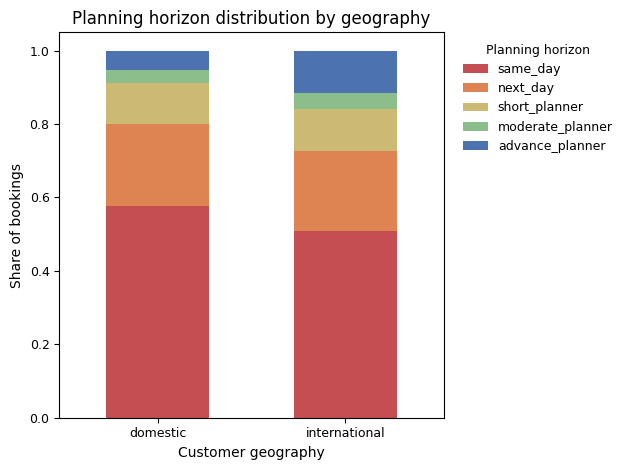

In [673]:
lead_country = pd.crosstab(
    df_bookings['country_type'],
    df_bookings['lead_days_bin'],
    normalize='index'
)

lead_country = lead_country[
    ['same_day', 'next_day', 'short_planner', 'moderate_planner', 'advance_planner']
]

colors = [
    '#c44e52',  
    '#dd8452',  
    '#ccb974',  
    '#8cbe8c',  
    '#4c72b0'   
]

# Plot
plt.figure(figsize=(6.5, 4))
lead_country.plot(
    kind='bar',
    stacked=True,
    width=0.55,
    color=colors
)

plt.ylabel('Share of bookings', fontsize=10)
plt.xlabel('Customer geography', fontsize=10)
plt.title('Planning horizon distribution by geography', fontsize=12)

plt.xticks(rotation=0, fontsize=9)
plt.yticks(fontsize=9)

plt.legend(
    title='Planning horizon',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=False,
    fontsize=9,
    title_fontsize=9
)

plt.tight_layout()
plt.show()

### Insights:
#### 1. Both domestic and international customers tend to book on the same day (>50%)
#### 2. International planners show higher incline towards advance planning (12% vs 5%)

In [616]:
pd.crosstab(df_bookings['country_type'], df_bookings['guest_size_bin'], normalize='index').round(2)

guest_size_bin,couple,large_group,small_group,solo
country_type,,,,
domestic,0.33,0.18,0.38,0.11
international,0.44,0.11,0.31,0.15


<Figure size 650x400 with 0 Axes>

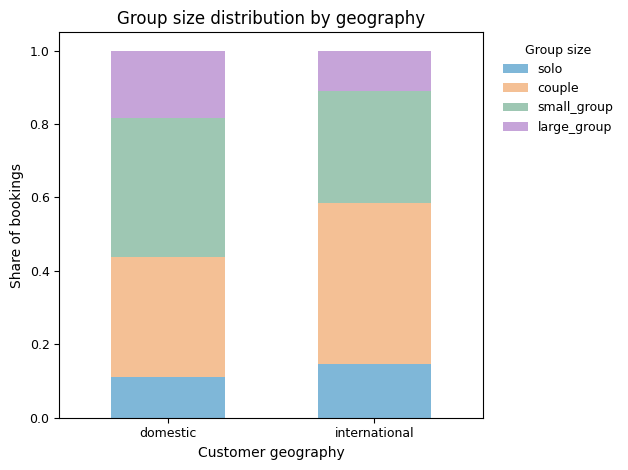

In [685]:
guest_country = pd.crosstab(
    df_bookings['country_type'],
    df_bookings['guest_size_bin'],
    normalize='index'
)

guest_country = guest_country[
    ['solo', 'couple', 'small_group', 'large_group']
]

colors = [
    '#7fb7d8',  
    '#f4c095',  
    '#9ec7b3',  
    '#c6a4d9'   
]

plt.figure(figsize=(6.5, 4))
guest_country.plot(
    kind='bar',
    stacked=True,
    width=0.55,
    color=colors
)

plt.ylabel('Share of bookings', fontsize=10)
plt.xlabel('Customer geography', fontsize=10)
plt.title('Group size distribution by geography', fontsize=12)

plt.xticks(rotation=0, fontsize=9)
plt.yticks(fontsize=9)

plt.legend(
    title='Group size',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=False,
    fontsize=9,
    title_fontsize=9
)

plt.tight_layout()
plt.show()

### Insights:
#### International travellers skew more toward couples (44%), compared to domestic users (33%).
#### Domestic users show a higher combined share of group travel (small + large groups = 56%) compared to international users (42%).
#### Solo travel represents a slightly higher share among international users (15%) than domestic users (11%), though it remains a minority segment overall.

### Core Personas:
#### 1. Lead Days
#### 2. Group Size
### Secondary persona:
#### 1. Booking frequency

# Observed differences across planning horizon, booking frequency, booking spacing behavior, and geographic distribution collectively validate the defined user personas as distinct and behaviorally meaningful segments

In [667]:
avg_booking_by_lead = (
    df_bookings
    .groupby(['lead_days_bin', 'customer_id'])['customer_booking_count']
    .first()
    .groupby('lead_days_bin')
    .mean()
    .sort_values(ascending=False)
)

avg_booking_by_lead

lead_days_bin
moderate_planner    2.513572
advance_planner     2.214212
short_planner       2.024466
next_day            1.749556
same_day            1.477378
Name: customer_booking_count, dtype: float64

In [669]:
avg_booking_by_lead_df = avg_booking_by_lead.reset_index(name='avg_booking_count')
avg_booking_by_lead_df

,lead_days_bin,avg_booking_count
0,moderate_planner,2.513572
1,advance_planner,2.214212
2,short_planner,2.024466
3,next_day,1.749556
4,same_day,1.477378
